<div style="background-color: #f8b195; padding: 5px;">
<h2 style="padding:0px 0px;"> Objective: Perform imputation on data </h2>

<div class="alert alert-info"><h3>SQLMR User guide </h3>

https://docs.teradata.com/r/Enterprise_IntelliFlex_VMware/Teradata-VantageTM-Analytics-Database-Analytic-Functions-17.20

</div>

In [1]:
%connect legion-demo

Password: ········


Success: 'legion-demo' connection established and activated for user 'artur-borycki_teradata', with default database 'legion-demo'


In [ ]:
Foreign table WEATHER already exists as it was restored as a definition as part of the deployment !!!!

### 1.2.1 Replace all missing entries for features as follows:
* Sunshine: MEAN.
* Cloud9am: MEDIAN
* WindDir9am: MODE
* WindDir3pm: literal ‘NA’
</h3>

In [4]:
select ColumnName, NullCount, NullPercentage from TD_ColumnSummary (
  on weather as InputTable
  using
  TargetColumns ('[:]')
) as dt ORDER BY NullCount desc;

,ColumnName,NullCount,NullPercentage
1,Sunshine,69834,48.00940471198069
2,Evaporation,62789,43.166115537711654
3,Cloud3pm,59358,40.80737527413223
4,Cloud9am,55888,38.42182333166047
5,Pressure9am,15065,10.356870320846424
6,Pressure3pm,15028,10.331433599846005
7,WindDir9am,10566,7.263902542984621
8,WindGustDir,10325,7.098220117008917
9,WindGustSpeed,10262,7.054908943413608
10,Humidity3pm,4507,3.0984676094294614


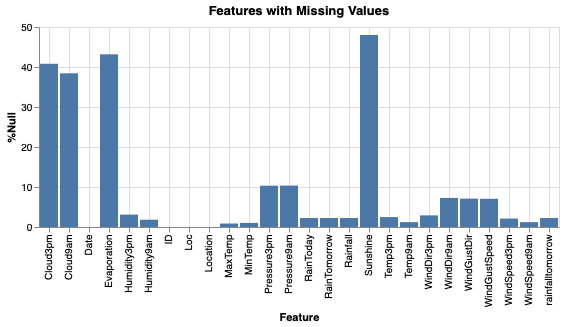

In [3]:
%chart x=ColumnName, y=NullPercentage, title="Features with Missing Values", labelx=Feature, labely=%Null

In [28]:
drop view fit_table;

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3807:Object 'fit_table' does not exist.

In [29]:
drop view weather_imputed;

ERROR: Unable to run SQL: Unable to run SQL query: Database reported error:3807:Object 'weather_imputed' does not exist.

In [2]:
create view fit_table as (
  select * from TD_SimpleImputeFit (
    on weather as InputTable
    USING
    ColsForStats ('sunshine','cloud9am', 'winddir9am')
    Stats ('mean','median','mode')
    ColsForLiterals ('winddir3pm')
    Literals ('NA')
  ) as dt
);

Success: 0 rows affected

In [3]:
create view weather_imputed as (
  select * from TD_SimpleImputeTransform (
    on weather as InputTable
    on fit_table as FitTable DIMENSION
  ) as dt
);

Success: 0 rows affected

<h3 style="padding:0px 0px;">1.2.2 What values were replaced for each? </h3>

In [4]:
select * from fit_table;

,TD_INDEX_SIMFIT,TD_TARGETCOLUMN_SIMFIT,TD_NUM_COLVAL_SIMFIT,TD_STR_COLVAL_SIMFIT,TD_ISNUMERIC_SIMFIT
1,8,Sunshine,7.611177520661184,,1
2,11,WindDir9am,,N,0
3,12,WindDir3pm,,NA,0
4,19,Cloud9am,5,,1


In [6]:
select id, sunshine, cloud9am, winddir9am,winddir3pm from weather where id = 17639;

,ID,Sunshine,Cloud9am,WindDir9am,WindDir3pm
1,17639,,,,


In [34]:
select id, sunshine, cloud9am, winddir9am,winddir3pm from weather_imputed where id = 17639;

,ID,Sunshine,Cloud9am,WindDir9am,WindDir3pm
1,17639,7.611177520661176,5,N,NA


In [5]:
select * from td_histogram (
  on weather as InputTable
  USING 
  MethodType ('Equal-width')
  TargetColumn ('sunshine')
  NBins(30)
) as dt;

,ColumnName,Label,MinValue,MaxValue,CountOfValues,Bin_Percent
1,Sunshine,1,0.48333333333333334,0.9666666666666667,1607,2.1249586776859504
2,Sunshine,9,4.35,4.833333333333333,1972,2.607603305785124
3,Sunshine,4,1.9333333333333333,2.4166666666666665,1597,2.1117355371900826
4,Sunshine,0,0,0.48333333333333334,4181,5.528595041322315
5,Sunshine,2,0.9666666666666667,1.45,1509,1.9953719008264463
6,Sunshine,10,4.833333333333333,5.316666666666666,2102,2.779504132231405
7,Sunshine,7,3.3833333333333333,3.8666666666666667,1688,2.2320661157024793
8,Sunshine,6,2.9,3.3833333333333333,1711,2.262479338842975
9,Sunshine,3,1.45,1.9333333333333333,1512,1.9993388429752064
10,Sunshine,11,5.316666666666666,5.8,1805,2.386776859504132


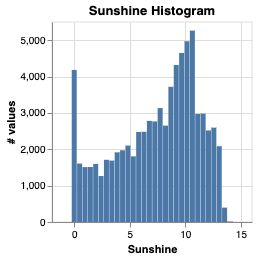

In [6]:
%chart x=Minvalue, y=CountOfValues, title="Sunshine Histogram", labelx=Sunshine, labely=# values

In [37]:
select * from td_histogram (
  on weather as InputTable
  USING 
  MethodType ('Sturges')
  TargetColumn ('cloud9am')
) as dt;

,ColumnName,Label,MinValue,MaxValue,CountOfValues,Bin_Percent
1,Cloud9am,1,0.5,1,0,0
2,Cloud9am,9,4.5,5,0,0
3,Cloud9am,4,2,2.5,6500,7.256813031003338
4,Cloud9am,0,0,0.5,8642,9.648212032912438
5,Cloud9am,2,1,1.5,15687,17.513480925746055
6,Cloud9am,10,5,5.5,5567,6.215181252860859
7,Cloud9am,7,3.5,4,0,0
8,Cloud9am,6,3,3.5,5914,6.602583425439038
9,Cloud9am,3,1.5,2,0,0
10,Cloud9am,11,5.5,6,0,0


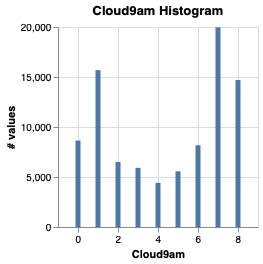

In [38]:
%chart x=Minvalue, y=CountOfValues, title="Cloud9am Histogram", labelx=Cloud9am, labely=# values

In [39]:
select * from TD_CategoricalSummary (
  on weather as InputTable
  using
    TargetColumns ('WindDir9am')
) as dt;

,ColumnName,DistinctValue,DistinctValueCount
1,WindDir9am,,10566
2,WindDir9am,NNW,7980
3,WindDir9am,ENE,7836
4,WindDir9am,ESE,7629
5,WindDir9am,E,9176
6,WindDir9am,S,8659
7,WindDir9am,NNE,8129
8,WindDir9am,SSW,7587
9,WindDir9am,N,11758
10,WindDir9am,SW,8423


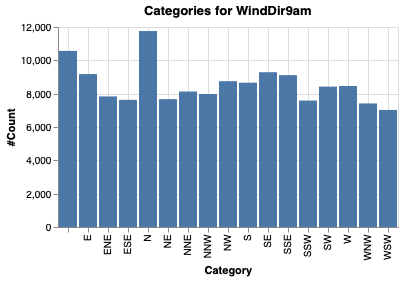

In [40]:
%chart x=DistinctValue, y=DistinctValueCount, title="Categories for WindDir9am", labelx=Category, labely=#Count

In [41]:
select * from TD_CategoricalSummary (
  on weather as InputTable
  using
    TargetColumns ('WindDir3pm')
) as dt;

,ColumnName,DistinctValue,DistinctValueCount
1,WindDir3pm,E,8472
2,WindDir3pm,N,8890
3,WindDir3pm,NE,8263
4,WindDir3pm,,4228
5,WindDir3pm,NNW,7870
6,WindDir3pm,SE,10838
7,WindDir3pm,NW,8610
8,WindDir3pm,ENE,7857
9,WindDir3pm,S,9926
10,WindDir3pm,SW,9354


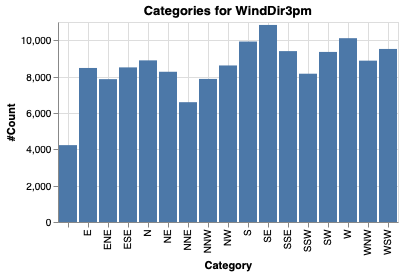

In [42]:
%chart x=DistinctValue, y=DistinctValueCount, title="Categories for WindDir3pm", labelx=Category, labely=#Count

<h3 style="padding:0px 0px;">1.2.3 Check if there are any rows left with missing values in these columns? </h3>

In [43]:
select ColumnName, NullCount, NullPercentage from TD_ColumnSummary (
  on weather_imputed as InputTable
  using
  TargetColumns ('[:]')
) as dt ORDER BY NullCount desc;

,ColumnName,NullCount,NullPercentage
1,Evaporation,62789,43.166115537711654
2,Cloud3pm,59358,40.80737527413223
3,Pressure9am,15065,10.356870320846424
4,Pressure3pm,15028,10.331433599846005
5,WindGustDir,10325,7.098220117008917
6,WindGustSpeed,10262,7.054908943413608
7,Humidity3pm,4507,3.0984676094294614
8,Temp3pm,3609,2.4811115159598236
9,RainTomorrow,3266,2.2453062374964765
10,rainfalltomorrow,3261,2.2418688427666904


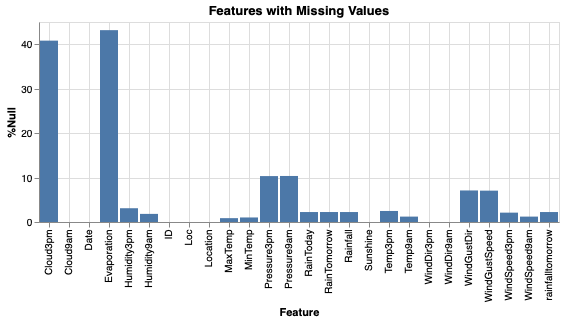

In [44]:
%chart x=ColumnName, y=NullPercentage, title="Features with Missing Values", labelx=Feature, labely=%Null

In [45]:
select * from TD_GetRowsWithMissingValues (
  on weather_imputed as InputTable
  USING
  TargetColumns('sunshine','cloud9am','winddir9am','winddir3pm')
) as dt;

WARNING: Empty Result Set

In [46]:
drop view fit_table

Success: 11 rows affected

In [47]:
drop view weather_imputed

Success: 32 rows affected